<a href="https://colab.research.google.com/github/xRomory/CCMACLRL_EXERCISES_COM231ML/blob/main/exercise_5/DeVera_Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
      - elizerimage1.jpg
      ...
    - Eliza
      - elizaimage1.jpg
      ...
    - Elijah
      - elijahimage1.jpg
      ...
  - Test
    - testimage1.jpg
    ...
```

- Upload 190 images of your self (selfied are recommended) in the Train folder
- Upload 190 images of your partner in the Train folder
- Upload 10 images each of yourself and your partner in the Test Folder (30 images total for each member)
- Use **.png** or **.jpg** or **.jpeg** images files

In [155]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [156]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Display one raw image directly from your drive

In [158]:
def display_image(image_path):
  image = Image.open(image_path)

  # Display using matplotlib
  plt.imshow(image)
  plt.axis("on")
  plt.show()

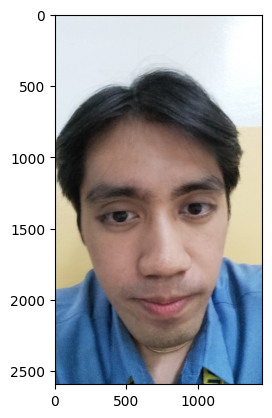

In [159]:
display_image("/content/drive/My Drive/Images/Train/Lawrence/lawrenceimage100.jpg")

## 2. Load the images from your drive and apply preprocessing to your raw images

In [160]:
def load_images_from_folder(folder):
  images = []
  labels = []
  for label, person in enumerate(os.listdir(folder)):
    person_folder = os.path.join(folder, person)
    person_name = os.path.basename(person_folder)

    for filename in os.listdir(person_folder):
      try:
        img_path = os.path.join(person_folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (250,250))
        images.append(img.flatten())
        labels.append(person_name)
      except Exception as e:
        # Checks what file causes an error
        print(filename)

  return np.array(images), np.array(labels)


Analyze Class Distribution

In [161]:
# Use the function
images, labels = load_images_from_folder("/content/drive/My Drive/Images/Train")

import pandas as pd

# Convert labels to a pandas Series for easy value counting
labels_series = pd.Series(labels)

# Get the count of each class
class_counts = labels_series.value_counts()

print("Class distribution in the training data:")
print(class_counts)

Class distribution in the training data:
Jude        190
Lovely      190
Lawrence    190
Name: count, dtype: int64


In [162]:
images.shape

(570, 62500)

In [163]:
labels.shape

(570,)

In [164]:
labels

array(['Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude',
       'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude',
       'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude',
       'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude',
       'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude',
       'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude',
       'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude',
       'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude',
       'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude',
       'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude',
       'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude',
       'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude',
       'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude',
       'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude', 'Jude',
      

## 3. Display one pre-processed image from the training set

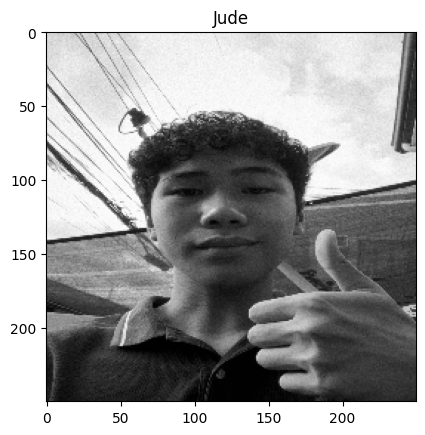

In [165]:
# Get a sample image and its corresponding time
image = images[0].reshape(250, 250)
name = labels[0]

# Display the image
plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis("on")
plt.show()

## 4. Display ten pre-processed images from the training set

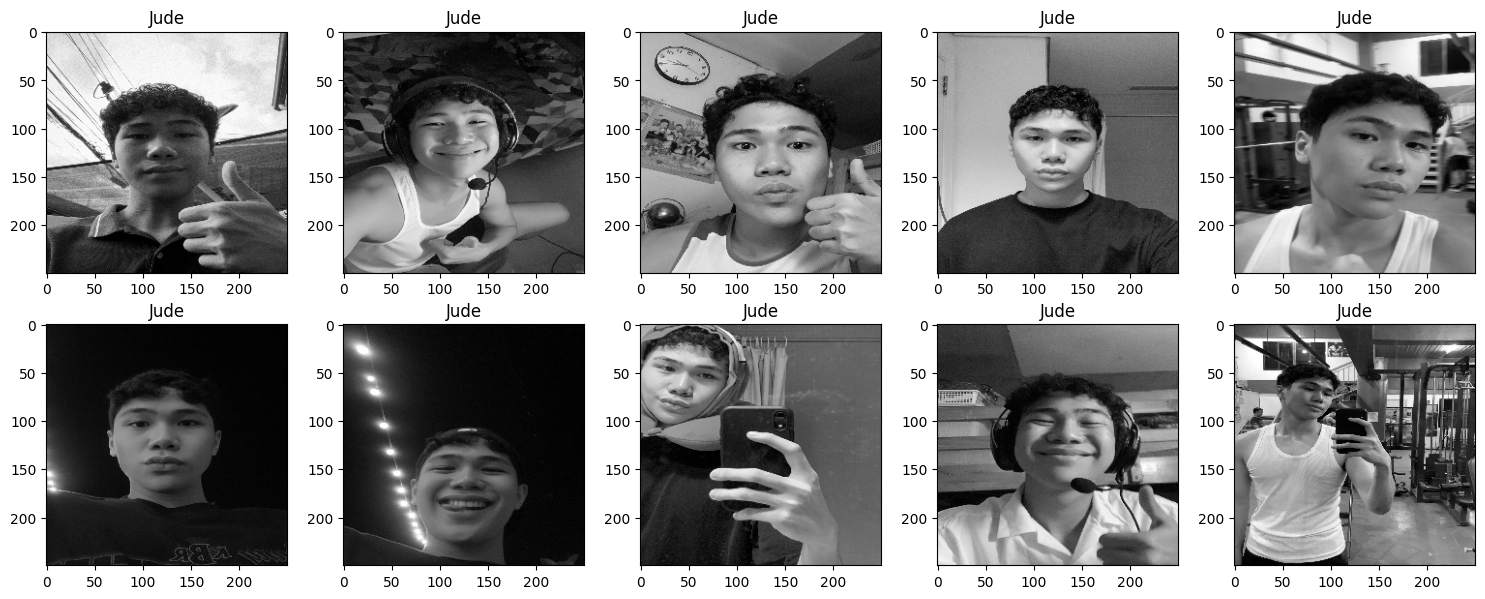

In [166]:
num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15,6))
axes = axes.flatten()

for i in range(num_faces):
  image = images[i].reshape(250,250)
  name = labels[i]

  axes[i].imshow(image, cmap="gray")
  axes[i].set_title(name)
  axes[i].axis("on")

plt.tight_layout()
plt.show()

## 5. Split your training data

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    images,
    labels,
    test_size=0.2,
    random_state=42,
)



In [168]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Train your SVM model

In [169]:
from sklearn import svm
model = svm.SVC(kernel="linear")

model.fit(X_train, y_train)

SVC(kernel='linear')

## 7. Evaluate your SVM model

In [170]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.70%


## 8. Test your model using images not in your training set

Use your SVM model to predict the label of all of your images in the Test folder

In [171]:
def predict_image(img_path, model):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (250, 250)).flatten().reshape(1, -1)
  prediction = model.predict(img)

  return prediction

Test Image of Jude, Lawrence, and Lovely

Predicted Label: ['Jude']


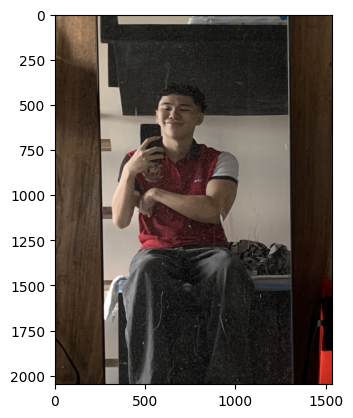

In [172]:
img_path = "/content/drive/My Drive/Images/Test/prodigalidadimage2.jpeg"
result = predict_image(img_path, model)
print(f"Predicted Label:", result)
display_image(img_path)

Predicted Label: ['Lovely']


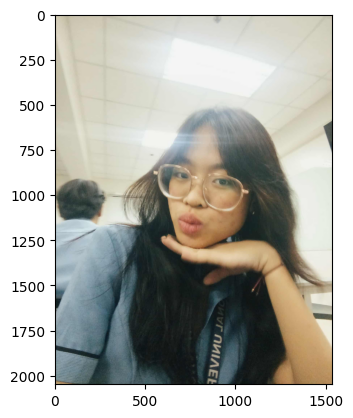

In [173]:
img_path = "/content/drive/My Drive/Images/Test/lovelyimage1.jpg"
result = predict_image(img_path, model)
print(f"Predicted Label:", result)
display_image(img_path)

Predicted Label: ['Lovely']


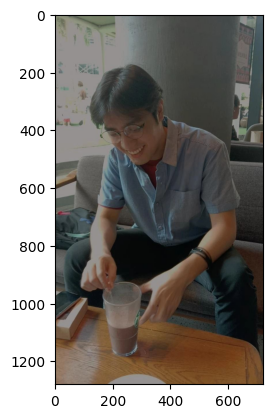

In [174]:
img_path = "/content/drive/My Drive/Images/Test/lawrenceimage11.jpg"
result = predict_image(img_path, model)
print(f"Predicted Label:", result)
display_image(img_path)